## Analyze A/B Test Results
## Table of Contents
- [Part I - Probability]
- [Part II - A/B Test]
- [Part III - Regression]




In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
random.seed(42)

Read in the dataset and take a look at the top few rows here.

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/Pravalika05/Data_Analyst_Portfolio/main/AB%20Testing%20analyze/ab_data.csv")
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


getting number of rows in the dataset.

In [ ]:
df.shape

(294478, 5)

The number of unique users in the dataset.

In [ ]:
df['user_id'].nunique()

290584

The proportion of users converted.

In [ ]:
df.converted.mean()

0.11965919355605512

The number of times the `new_page` and `treatment` don't match.

In [ ]:
line_1 = df.query('group == "treatment" and landing_page == "old_page"').count()

In [ ]:
line_2 = df.query('group == "control" and landing_page == "new_page"').count()

In [ ]:
line_1 + line_2

user_id         3893
timestamp       3893
group           3893
landing_page    3893
converted       3893
dtype: int64

Do any of the rows have missing values?

In [ ]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  


In [ ]:
df2 = df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == True]
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [ ]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [ ]:
df2['converted'].value_counts()

0    255832
1     34753
Name: converted, dtype: int64

How many unique **user_id**s are in **df2**?

In [ ]:
df2['user_id'].nunique()

290584

There is one **user_id** repeated in **df2**.  What is it?

In [ ]:
df2[df2.duplicated('user_id')]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


What is the row information for the repeat **user_id**?

In [ ]:
df2[df2.duplicated(['user_id'], keep = False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [ ]:
# drop duplicates
df2.drop_duplicates(keep='first')
df2.duplicated().sum()

0

What is the probability of an individual converting regardless of the page they receive?

In [ ]:
df2['converted'].mean()

0.11959667567149027

Given that an individual was in the `control` group, what is the probability they converted?

In [ ]:
df.groupby('group').mean()

<ipython-input-18-c15cdaf6c41c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('group').mean()


,user_id,converted
group,,
control,788123.098035,0.120399
treatment,787825.226283,0.118920


Given that an individual was in the `treatment` group, what is the probability they converted?

probability they converted for given that an individual was in the treatment is 0.118920

What is the probability that an individual received the new page?

In [ ]:
df2.landing_page.value_counts()[0]/len(df2)

0.5000636646764286

Observation: About 12% control group converted and 11.89% treatment group converted. So there is not sufficient evidence to conclude that the new page leads to more conversions.


<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**

H0: Pnew - Pold <= 0 (Old page have higher population rate)

H1: Pnew - Pold > 0 (new page have higher population rate)



`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  

a. What is the **conversion rate** for $p_{new}$ under the null?

In [ ]:
p_new = df2[df2['landing_page'] == 'new_page'].converted.mean()
print(p_new)

0.11880724790277405


b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [ ]:
p_old = df2[df2['landing_page']== 'old_page'].converted.mean()
print(p_old)

0.1203863045004612


In [ ]:
p_avg = (p_new + p_old)/2
print(p_avg)

0.11959677620161763


In [ ]:
n_new = df2['landing_page'].value_counts()
print(n_new)

new_page    145311
old_page    145274
Name: landing_page, dtype: int64


c. What is $n_{new}$, the number of individuals in the treatment group?

In [ ]:
n_new, n_old = df2['landing_page'].value_counts()
print(n_new)

145311


d. What is $n_{old}$, the number of individuals in the control group?

In [ ]:
n_new,n_old = df2['landing_page'].value_counts()
print(n_old)

145274


e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [ ]:
new_page_converted = np.random.choice([0,1], size = n_new, p=(p_avg, 1-p_avg))
print(new_page_converted)
new_page_converted.mean()

[1 1 1 ... 1 1 1]


0.8792796140691345

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [ ]:
old_page_converted = np.random.choice([0,1], size = n_old, p = (p_avg, 1-p_avg))
print(old_page_converted)
old_page_converted.mean()

[1 1 1 ... 1 1 1]


0.8788633891818219

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [ ]:
actual_diff = new_page_converted.mean() - old_page_converted.mean()
print(actual_diff)

0.00041622488731252183


h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [ ]:
p_diffs = []
new = np.random.binomial(n_new, p_avg, 10000)/n_new
old = np.random.binomial(n_old, p_avg, 10000)/n_old
p_diffs = new - old

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

(array([  20.,  130.,  699., 1858., 2941., 2605., 1312.,  372.,   59.,
           4.]),
 array([-0.0044766 , -0.00353919, -0.00260177, -0.00166436, -0.00072695,
         0.00021046,  0.00114787,  0.00208528,  0.00302269,  0.0039601 ,
         0.00489751]),
 <BarContainer object of 10 artists>)

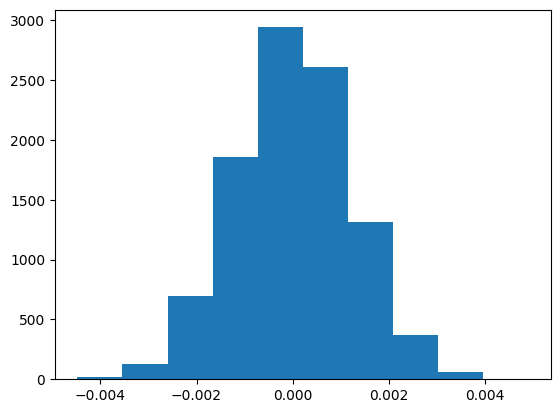

In [ ]:
p_diffs = np.array(p_diffs)
plt.hist(p_diffs)

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [ ]:
#compute actual conversion rate
# number of landing new page and converted  / number of landing new page
converted_new = df2.query('converted == 1 and landing_page== "new_page"')['user_id'].nunique()
actual_new = float(converted_new) / float(n_new)

# number of landing old page and converted  / number of landing old page
converted_old = df2.query('converted == 1 and landing_page== "old_page"')['user_id'].nunique()
actual_old = float(converted_old) / float(n_old)

#observed difference in converted rate
obs_diff = actual_diff = actual_new - actual_old
obs_diff

-0.0015790565976871451

In [ ]:
# create distribution under the null hypothesis
null_vals = np.random.normal(0, p_diffs.std(), p_diffs.size)

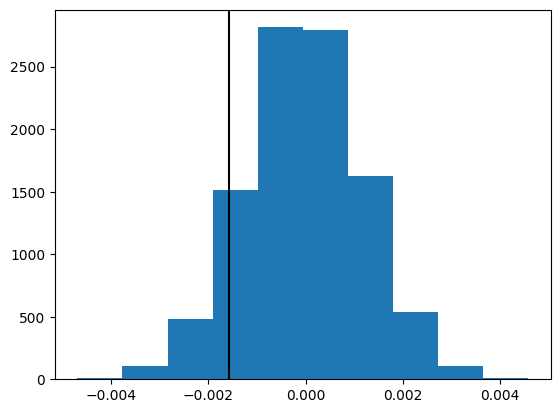

In [ ]:
#Plot Null distribution
plt.hist(null_vals)
#Plot vertical line for observed statistic
plt.axvline(x=obs_diff,color ='black')

Observation:
We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [ ]:
import statsmodels.api as sm

convert_old = df2.query('converted == 1 and landing_page== "old_page"').user_id.nunique()
convert_new = converted_old = df2.query('converted == 1 and landing_page== "new_page"').user_id.nunique()
n_old = df2.query('landing_page == "old_page"')['user_id'].nunique()
n_new = df2.query('landing_page == "new_page"')['user_id'].nunique()

convert_old,convert_new , n_old , n_new

(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://www.statsmodels.org/devel/generated/statsmodels.stats.proportion.proportions_ztest.html) is a helpful link on using the built in.

In [ ]:
# compute the sm.stats.proportions_ztest using the alternative
z_score, p_value = sm.stats.proportions_ztest(np.array([convert_new,convert_old]),np.array([n_new,n_old]), alternative = 'larger')
z_score, p_value

(-1.3109241984234394, 0.9050583127590245)

Observations:
1) Since the z-score of 1.3109241984234394 does not exceed the critical value of 1.959963984540054, we fail to reject the null hypothesis. Therefore, the converted rate for new page and old page have no difference. This result is the same as parts J. and K. result.

2) The z-score is greater than the value of -0.1645 (one-tail test) and hence it suggests that we can't reject the null.

3) And the p-value determines the significance of our resuls. The values are different from parts j and k but it still suggests that there is no statistically significant difference betweem the new and the old page.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Observation:
In my opinion Logistic regression is the best option because value is categorical.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [ ]:
df2['intercept']=1 #define intercept as 1
df2[['control', 'treatment']] = pd.get_dummies(df2['group'])

<ipython-input-37-9562d0f8aaaa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['intercept']=1 #define intercept as 1
<ipython-input-37-9562d0f8aaaa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[['control', 'treatment']] = pd.get_dummies(df2['group'])
<ipython-input-37-9562d0f8aaaa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

In [ ]:
df2.tail()

,user_id,timestamp,group,landing_page,converted,intercept,control,treatment
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0,1,1,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0,1,1,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0,1,1,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0,1,1,0
294477,715931,2017-01-16 12:40:24.467417,treatment,new_page,0,1,0,1


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [ ]:
logit = sm.Logit(df2['converted'],df2[['intercept','treatment']])

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [ ]:
results = logit.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290583
Method:                           MLE   Df Model:                            1
Date:                Sun, 27 Aug 2023   Pseudo R-squ.:               8.085e-06
Time:                        12:34:26   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1897
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
treatment     -0.0150      0.011     -1.312      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

Observation:
The p-value of the treatment (ab_page) is 0.190.

There is significant difference is observe between part2 and part3, because we have compared the conversion rate of new and old page in part2 and tried to look at if there is a significant difference between them. But, in logistic regression, we are trying to answer if treatment (ab_page) statistically significant attribute to explain the difference in the conversion rate.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

Observation:
We may add some other factors that affects the people's choice. However adding too much factors lead us bad results, even if we have all the p-values of attiributes significant, the performance of the regression model might not be better. The main idea is to find minimum number of attributes that tell us the maximum information we need.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables.

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [46]:
df_country = pd.read_csv('https://raw.githubusercontent.com/Pravalika05/Data_Analyst_Portfolio/main/AB%20Testing%20analyze/countries%20(1).csv')
df_country.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [47]:
df2 = df2.join(df_country.set_index('user_id'),on='user_id')
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,treatment,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0,US


In [48]:
df2['country'].value_counts()

US    203620
UK     72466
CA     14499
Name: country, dtype: int64

In [49]:
# create dummy variables for country
dummy_df = pd.get_dummies(data=df_country, columns=['country'])
df2 = dummy_df.merge(df2, on='user_id')
df2.head()

,user_id,country_CA,country_UK,country_US,timestamp,group,landing_page,converted,intercept,control,treatment,country
0,834778,0,1,0,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0,UK
1,928468,0,0,1,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,US
2,822059,0,1,0,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,UK
3,711597,0,1,0,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0,UK
4,710616,0,1,0,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1,UK


In [53]:
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'country_UK', 'country_US']])
result = log_mod.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366115
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            2
Date:                Sun, 27 Aug 2023   Pseudo R-squ.:               1.521e-05
Time:                        12:45:48   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1983
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
country_UK     0.0507      0.028      1.786      0.074      -0.005       0.106
country_US     0.0408      0.027      1.518      0.129      -0.012       0.093
==============================================================================
"""

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

In [54]:
logit_2 = sm.Logit(df2['converted'], df2[['treatment','intercept', 'country_UK', 'country_US']])
result_2 = logit_2.fit()

Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


In [55]:
result_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            3
Date:                Sun, 27 Aug 2023   Pseudo R-squ.:               2.324e-05
Time:                        12:46:54   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1758
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
treatment     -0.0150      0.011     -1.308      0.191      -0.037       0.007
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
country_UK     0.0506      0.028      1.784      0.074      -0.005       0.106
country_US     0.0408      0.027      1.516      0.130      -0.012       0.093
==============================================================================
"""

# CONCLUSION:


1) All the p-values are greater than 0.05 except intercept. As per we obtaioned in the last regression, we fail to reject H0.

2) The old page performs better than new one.

3) There is no enough evidence that we confidently reject the null hypothesis.

<a id='conclusions'></a>
## Finishing Up
We have reached the end of the A/B Test Results project!  


In [57]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results.ipynb'])

255